In [1]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

plt.style.use('../style.mpl')
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 780 nodes and 30052 edges


In [ ]:
# Calculate Local Clustering Coefficient for Each Node
clustering_coeffs = nx.clustering(G)
print(clustering_coeffs)    

{'Chris Brown': 0.5287081339712919, 'Usher': 0.8208373904576436, 'Ne-Yo': 1.0, 'Joe': 1.0, 'Brian McKnight': 1.0, 'Boyz II Men': 1.0, 'Babyface': 1.0, 'Mario': 0.8208373904576436, 'Mint Condition': 1.0, 'DAY26': 1.0, 'Musiq Soulchild': 1.0, 'Weezer': 0.3986013986013986, 'Modern Baseball': 0.5348765432098765, 'Red Hot Chili Peppers': 1.0, 'Jesse Marchant': 1.0, 'The Hundred Acre Woods': 1.0, 'Jake Shimabukuro': 1.0, 'The White Stripes': 1.0, 'Beck': 1.0, 'Arctic Monkeys': 0.5348765432098765, 'HONNE': 1.0, 'Total Science': 1.0, 'Kings of Leon': 0.4280634920634921, 'Foo Fighters': 1.0, 'Pearl Jam': 1.0, 'The Pretty Reckless': 1.0, 'Fall Out Boy': 0.3164746371390094, 'Oh Wonder': 0.609009009009009, 'Pentatonix': 0.6007995431182181, 'Daft Punk': 1.0, 'Nine Inch Nails': 1.0, 'Rage Against The Machine': 1.0, 'Soundgarden': 1.0, 'blink-182': 0.645877378435518, 'The Lawrence Arms': 1.0, 'Panic! At The Disco': 0.3763219741480611, 'My Chemical Romance': 0.5262896825396826, 'Paramore': 0.445550027

In [ ]:
G.degree() 

DegreeView({'Chris Brown': 133, 'Usher': 79, 'Ne-Yo': 10, 'Joe': 10, 'Brian McKnight': 10, 'Boyz II Men': 10, 'Babyface': 10, 'Mario': 79, 'Mint Condition': 10, 'DAY26': 10, 'Musiq Soulchild': 10, 'Weezer': 78, 'Modern Baseball': 81, 'Red Hot Chili Peppers': 32, 'Jesse Marchant': 32, 'The Hundred Acre Woods': 32, 'Jake Shimabukuro': 32, 'The White Stripes': 32, 'Beck': 32, 'Arctic Monkeys': 81, 'HONNE': 32, 'Total Science': 32, 'Kings of Leon': 126, 'Foo Fighters': 32, 'Pearl Jam': 32, 'The Pretty Reckless': 32, 'Fall Out Boy': 164, 'Oh Wonder': 111, 'Pentatonix': 103, 'Daft Punk': 32, 'Nine Inch Nails': 32, 'Rage Against The Machine': 32, 'Soundgarden': 32, 'blink-182': 44, 'The Lawrence Arms': 32, 'Panic! At The Disco': 185, 'My Chemical Romance': 64, 'Paramore': 135, 'Transit': 32, 'DJ Qbert': 32, 'Allie X': 32, 'Bombay Bicycle Club': 206, 'Catfish and the Bottlemen': 32, 'N.E.R.D': 32, 'Green Day': 97, 'Sum 41': 16, 'New Found Glory': 16, 'The Offspring': 16, 'AFI': 16, 'Good Charl

In [19]:
# Store Pairs of (Degree, LCC)
degree_lcc_pairs = []
for node, degree in G.degree():
    lcc = clustering_coeffs[node]
    degree_lcc_pairs.append((degree, lcc))
degree_lcc_pairs = np.array(degree_lcc_pairs)
print(degree_lcc_pairs)

max_degree = np.max(degree_lcc_pairs[:, 0])
print(max_degree)

[[133.           0.52870813]
 [ 79.           0.82083739]
 [ 10.           1.        ]
 ...
 [ 12.           1.        ]
 [ 12.           1.        ]
 [ 12.           1.        ]]
460.0


In [14]:
# Group by Degree and Calculate Average LCC
degree_lcc_dict = {}
for degree, lcc in degree_lcc_pairs:
    if degree not in degree_lcc_dict:
        degree_lcc_dict[degree] = []
    degree_lcc_dict[degree].append(lcc)
average_lcc = {degree: np.mean(lccs) for degree, lccs in degree_lcc_dict.items()}
print(average_lcc)
# Sort by Degree
sorted_average_lcc = sorted(average_lcc.items())
degrees, average_lcc_values = zip(*sorted_average_lcc)

{np.float64(133.0): np.float64(0.5287081339712919), np.float64(79.0): np.float64(0.993109130402217), np.float64(10.0): np.float64(1.0), np.float64(78.0): np.float64(0.3986013986013986), np.float64(81.0): np.float64(0.9844958847736626), np.float64(32.0): np.float64(1.0), np.float64(126.0): np.float64(0.5457777777777777), np.float64(164.0): np.float64(0.3164746371390094), np.float64(111.0): np.float64(0.609009009009009), np.float64(103.0): np.float64(0.6342090234151914), np.float64(44.0): np.float64(0.645877378435518), np.float64(185.0): np.float64(0.3763219741480611), np.float64(64.0): np.float64(0.5262896825396826), np.float64(135.0): np.float64(0.4455500276395799), np.float64(206.0): np.float64(0.4017523087852238), np.float64(97.0): np.float64(0.9926167374166159), np.float64(16.0): np.float64(1.0), np.float64(93.0): np.float64(0.7538569424964937), np.float64(105.0): np.float64(0.6206959706959707), np.float64(50.0): np.float64(0.9892830978545265), np.float64(34.0): np.float64(1.0), np.

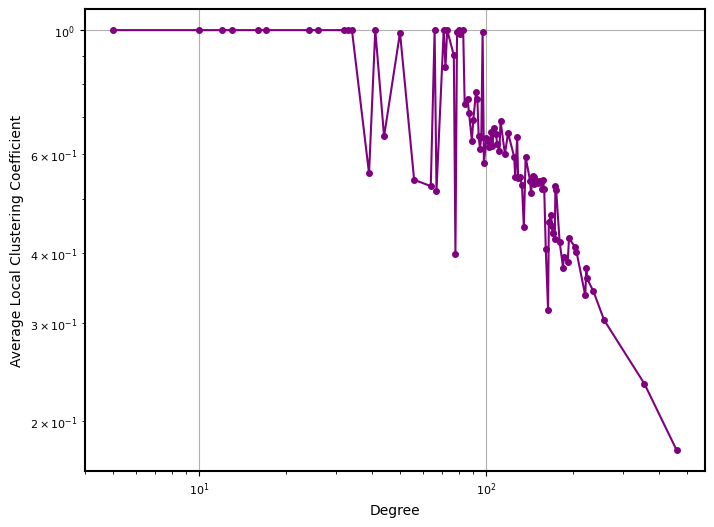

In [48]:
# Plot the average LCC values against the degree values
plt.figure(figsize=(8,6))
plt.plot(degrees, average_lcc_values, marker='o', linestyle='-', color='purple', markersize=4)
plt.xlabel('Degree')
plt.ylabel('Average Local Clustering Coefficient')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.savefig('../plots/average_lcc_vs_degree.png', transparent=True)
plt.show()